# Confirm an Eigenvector and Eigenvalue
We can confirm that a vector is indeed an eigenvector of a matrix. We do this by multiplying
the candidate eigenvector by the value vector and comparing the result with the eigenvalue.
First, we will define a matrix, then calculate the eigenvalues and eigenvectors. We will then test
whether the first vector and value are in fact an eigenvalue and eigenvector for the matrix. We
know they are, but it is a good exercise.
The eigenvectors are returned as a matrix with the same dimensions as the parent matrix,
where each column is an eigenvector, e.g. the first eigenvector is vectors[:, 0]. Eigenvalues
are returned as a list, where value indices in the returned array are paired with eigenvectors
by column index, e.g. the first eigenvalue at values[0] is paired with the first eigenvector at
vectors[:, 0].

In [1]:
# confirm eigenvector
from numpy import array
from numpy.linalg import eig
# define matrix
A = array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]])
# factorize
values, vectors = eig(A)
# confirm first eigenvector
B = A.dot(vectors[:, 0])
print(B)
C = vectors[:, 0] * values[0]
print(C)

[ -3.73863537  -8.46653421 -13.19443305]
[ -3.73863537  -8.46653421 -13.19443305]


# Reconstruct Matrix
We can reverse the process and reconstruct the original matrix given only the eigenvectors and
eigenvalues. First, the list of eigenvectors must be taken together as a matrix, where each vector
becomes a row. The eigenvalues need to be arranged into a diagonal matrix. The NumPy
diag() function can be used for this. Next, we need to calculate the inverse of the eigenvector
matrix, which we can achieve with the inv() NumPy function. Finally, these elements need to
be multiplied together with the dot() function.

In [2]:
# reconstruct matrix
from numpy import diag
from numpy.linalg import inv
from numpy import array
from numpy.linalg import eig
# define matrix
A = array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]])
print(A)
# factorize
values, vectors = eig(A)
# create matrix from eigenvectors
Q = vectors
# create inverse of eigenvectors matrix
R = inv(Q)
# create diagonal matrix from eigenvalues
L = diag(values)
# reconstruct the original matrix
B = Q.dot(L).dot(R)
print(B)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


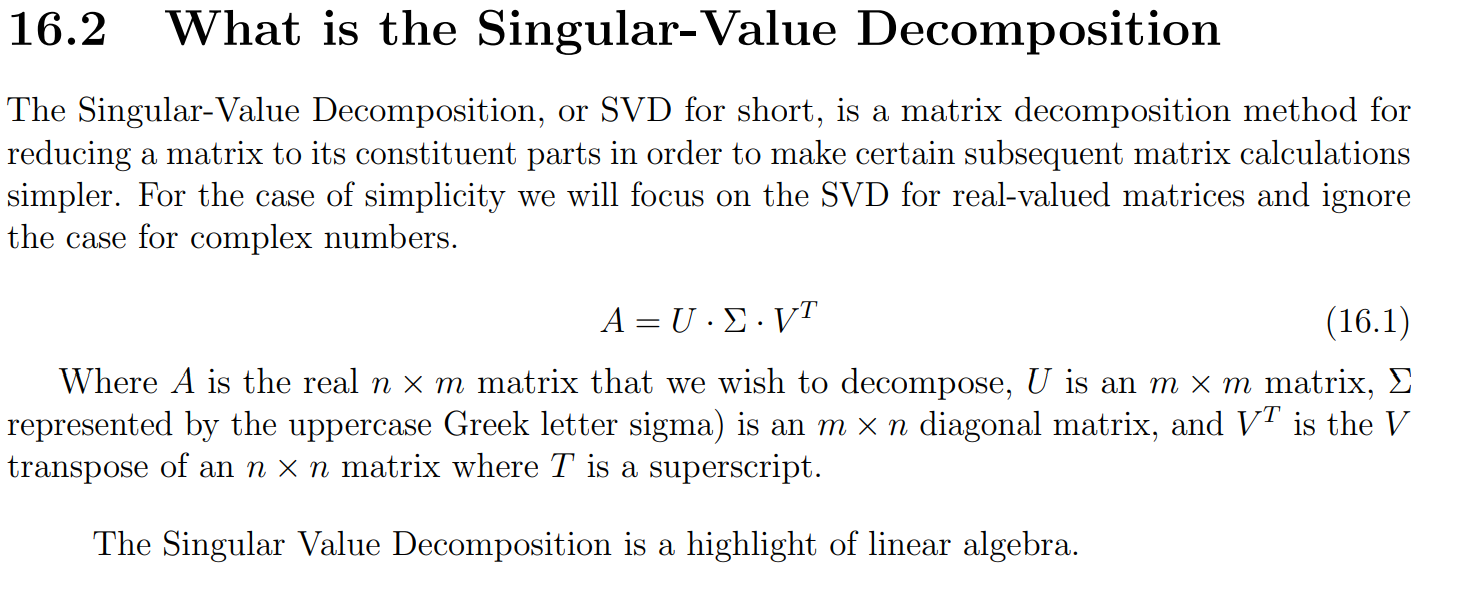

In [3]:
# singular-value decomposition
from numpy import array
from scipy.linalg import svd
# define a matrix
A = array([
    [1, 2],
    [3, 4],
    [5, 6]])
print(A)
# factorize
U, s, V = svd(A)
print(U)
print(s)
print(V)


[[1 2]
 [3 4]
 [5 6]]
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
[9.52551809 0.51430058]
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


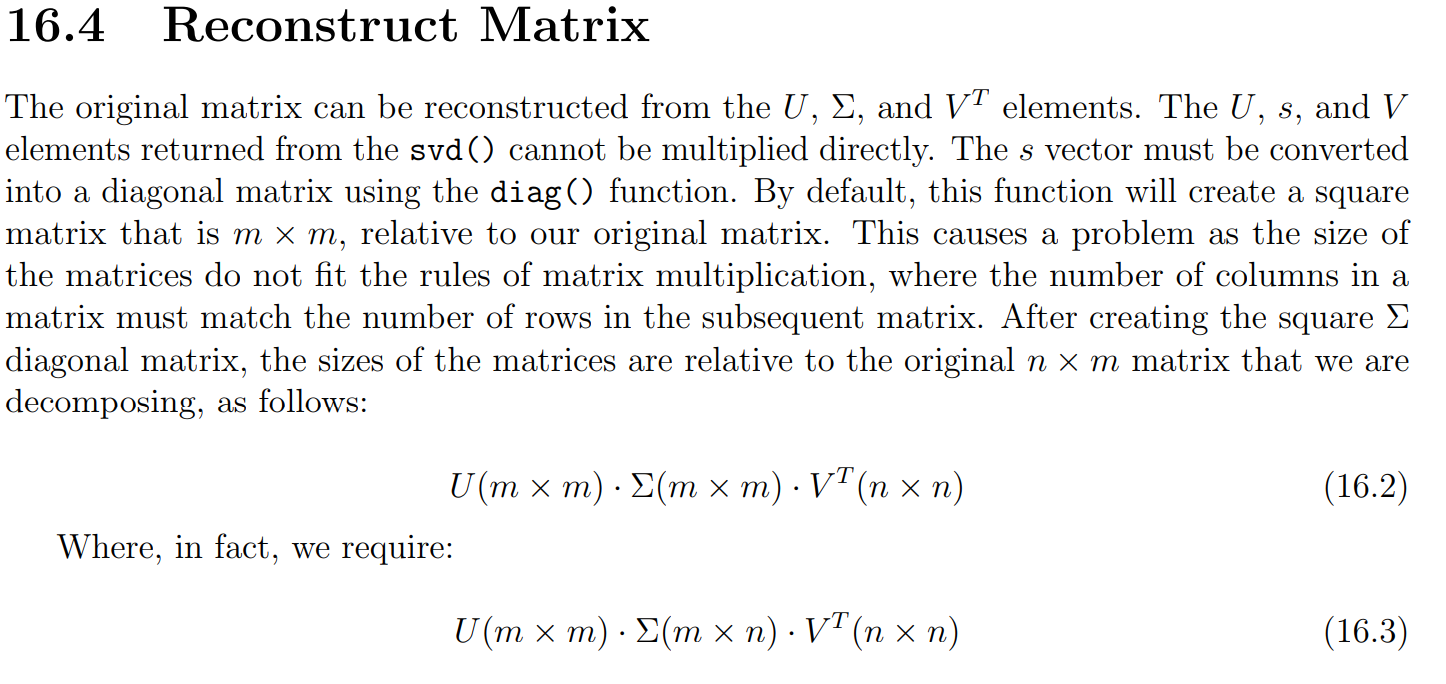

  We can achieve this by creating a new Σ matrix of all zero values that is m × n (e.g. more
rows) and populate the first n × n part of the matrix with the square diagonal matrix calculated
via diag().

In [2]:
# reconstruct rectangular matrix from svd
from numpy import array
from numpy import diag
from numpy import zeros
from scipy.linalg import svd
# define matrix
A = array([
    [1, 2],
    [3, 4],
    [5, 6]])
print(A)
# factorize
U, s, V = svd(A)
# create m x n Sigma matrix
Sigma = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[1], :A.shape[1]] = diag(s)
print(Sigma)
# reconstruct matrix
B = U.dot(Sigma.dot(V))
print(B)

[[1 2]
 [3 4]
 [5 6]]
[[9.52551809 0.        ]
 [0.         0.51430058]
 [0.         0.        ]]
[[1. 2.]
 [3. 4.]
 [5. 6.]]


The above complication with the Σ diagonal only exists with the case where m and n are
not equal. The diagonal matrix can be used directly when reconstructing a square matrix, as
follows.

In [3]:
# reconstruct square matrix from svd
from numpy import array
from numpy import diag
from scipy.linalg import svd
# define matrix
A = array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]])
print(A)
# factorize
U, s, V = svd(A)
# create n x n Sigma matrix
Sigma = diag(s)
# reconstruct matrix
B = U.dot(Sigma.dot(V))
print(B)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


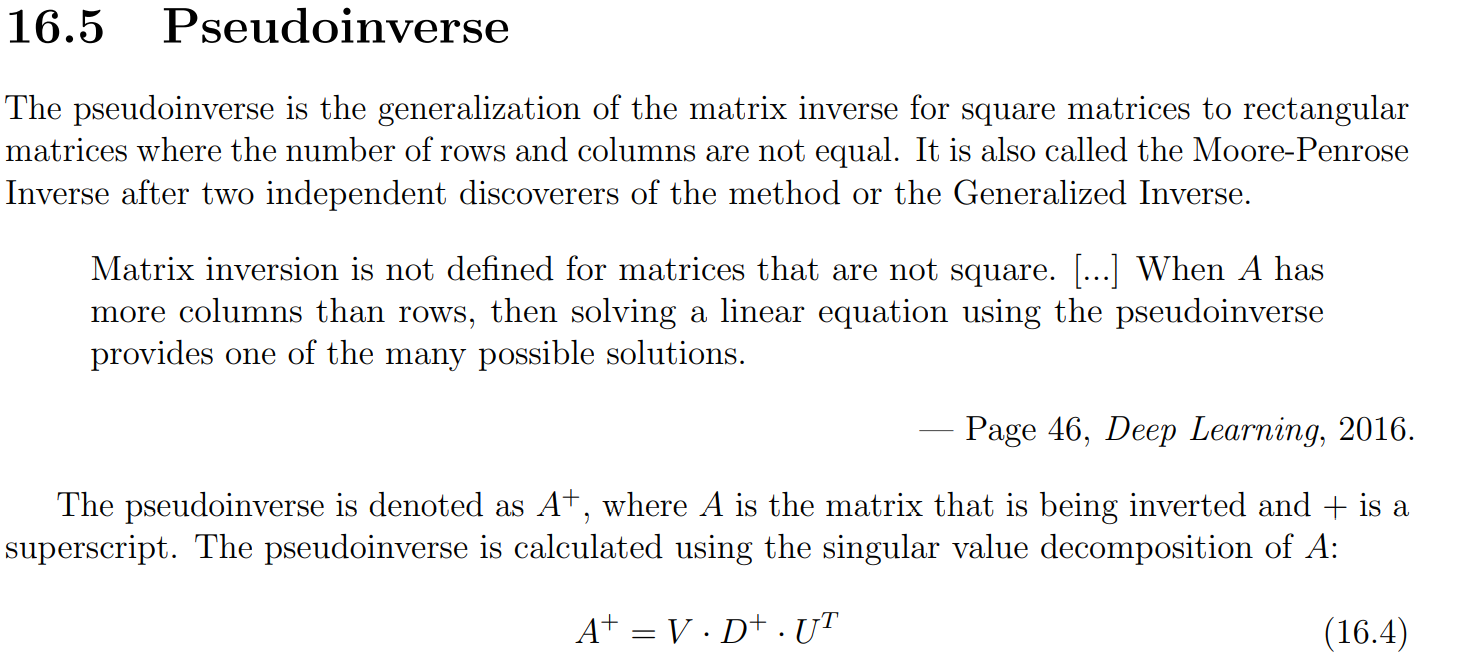

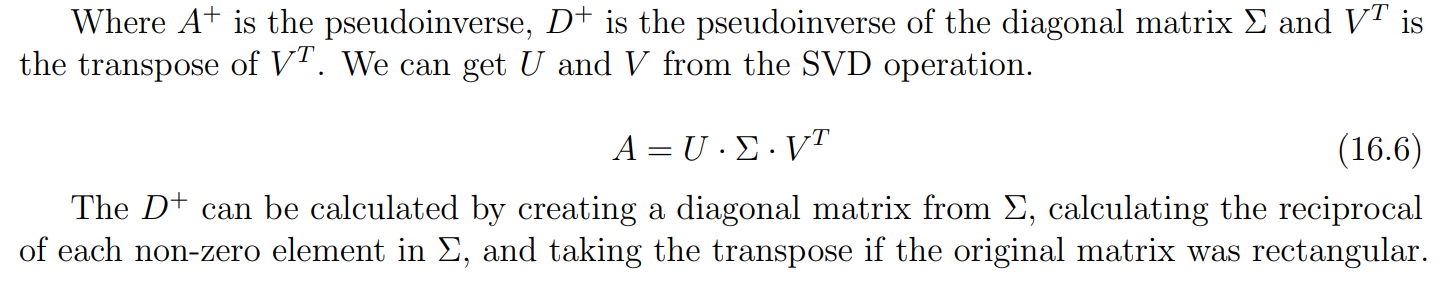

The pseudoinverse provides one way of solving the linear regression equation, specifically
when there are more rows than there are columns, which is often the case. NumPy provides the
function pinv() for calculating the pseudoinverse of a rectangular matrix. The example below
defines a 4 × 2 matrix and calculates the pseudoinverse.

In [4]:
# pseudoinverse
from numpy import array
from numpy.linalg import pinv
# define matrix
A = array([
[0.1, 0.2],
[0.3, 0.4],
[0.5, 0.6],
[0.7, 0.8]])
print(A)
# calculate pseudoinverse
B = pinv(A)
print(B)

[[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]
 [0.7 0.8]]
[[-1.00000000e+01 -5.00000000e+00  1.28757642e-14  5.00000000e+00]
 [ 8.50000000e+00  4.50000000e+00  5.00000000e-01 -3.50000000e+00]]


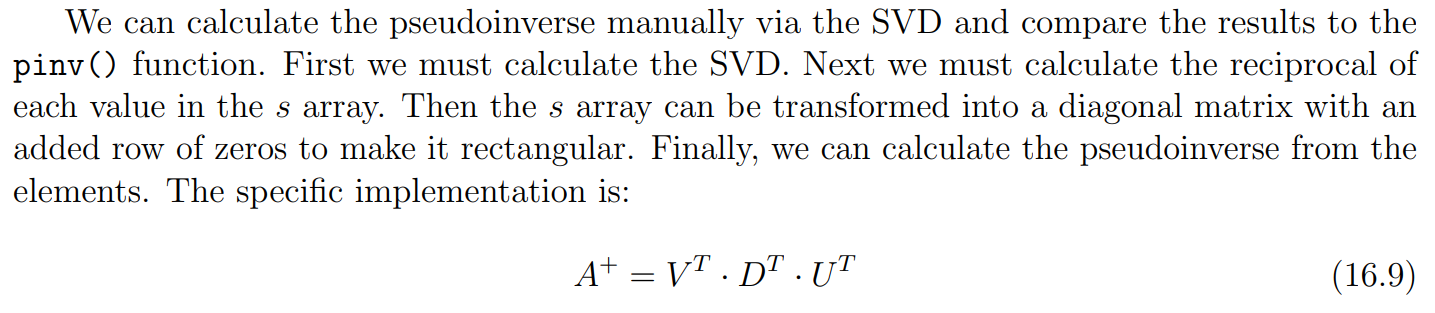

In [5]:
# pseudoinverse via svd
from numpy import array
from numpy.linalg import svd
from numpy import zeros
from numpy import diag
# define matrix
A = array([
    [0.1, 0.2],
    [0.3, 0.4],
    [0.5, 0.6],
    [0.7, 0.8]])
print(A)
# factorize
U, s, V = svd(A)
# reciprocals of s
d = 1.0 / s
# create m x n D matrix
D = zeros(A.shape)
# populate D with n x n diagonal matrix
D[:A.shape[1], :A.shape[1]] = diag(d)
# calculate pseudoinverse
B = V.T.dot(D.T).dot(U.T)
print(B)

[[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]
 [0.7 0.8]]
[[-1.00000000e+01 -5.00000000e+00  1.28565458e-14  5.00000000e+00]
 [ 8.50000000e+00  4.50000000e+00  5.00000000e-01 -3.50000000e+00]]


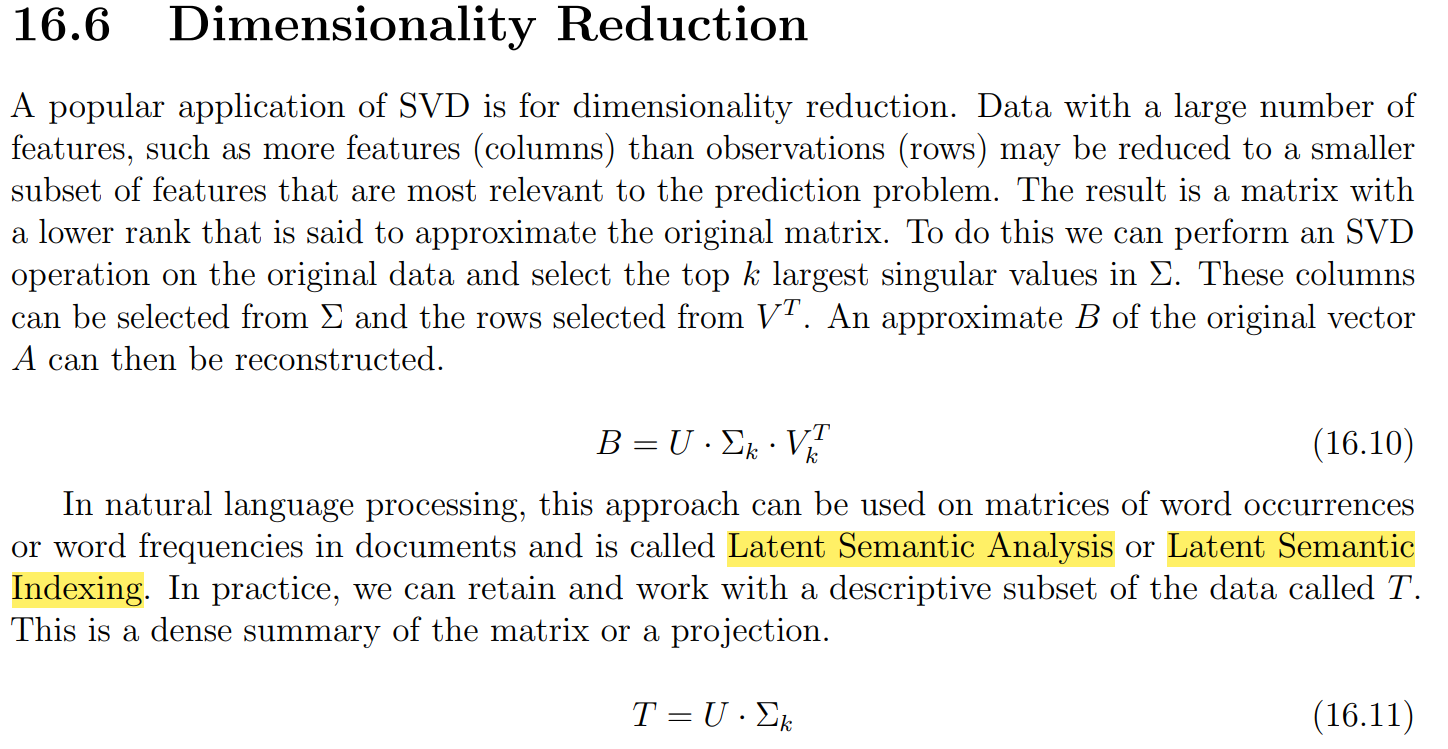

In [1]:
# data reduction with svd
from numpy import array
from numpy import diag
from numpy import zeros
from scipy.linalg import svd
# define matrix
A = array([
[1,2,3,4,5,6,7,8,9,10],
[11,12,13,14,15,16,17,18,19,20],
[21,22,23,24,25,26,27,28,29,30]])
print(A)
# factorize
U, s, V = svd(A)
# create m x n Sigma matrix
Sigma = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[0], :A.shape[0]] = diag(s)
# select
n_elements = 2
Sigma = Sigma[:, :n_elements]
V = V[:n_elements, :]
# reconstruct
B = U.dot(Sigma.dot(V))
print(B)
# transform
T = U.dot(Sigma)
print(T)
T = A.dot(V.T)
print(T)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]]
[[-18.52157747   6.47697214]
 [-49.81310011   1.91182038]
 [-81.10462276  -2.65333138]]
[[-18.52157747   6.47697214]
 [-49.81310011   1.91182038]
 [-81.10462276  -2.65333138]]


The scikit-learn provides a TruncatedSVD class that implements this capability directly. The
TruncatedSVD class can be created in which you must specify the number of desirable features
or components to select, e.g. 2. Once created, you can fit the transform (e.g. calculate V
T
k
)
by calling the fit() function, then apply it to the original matrix by calling the transform()
function. The result is the transform of A called T above. The example below demonstrates the
TruncatedSVD class.

In [2]:
# svd data reduction in scikit-learn
from numpy import array
from sklearn.decomposition import TruncatedSVD
# define matrix
A = array([
    [1,2,3,4,5,6,7,8,9,10],
    [11,12,13,14,15,16,17,18,19,20],
    [21,22,23,24,25,26,27,28,29,30]])
print(A)
# create transform
svd = TruncatedSVD(n_components=2)
# fit transform
svd.fit(A)
# apply transform
result = svd.transform(A)
print(result)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
[[18.52157747  6.47697214]
 [49.81310011  1.91182038]
 [81.10462276 -2.65333138]]


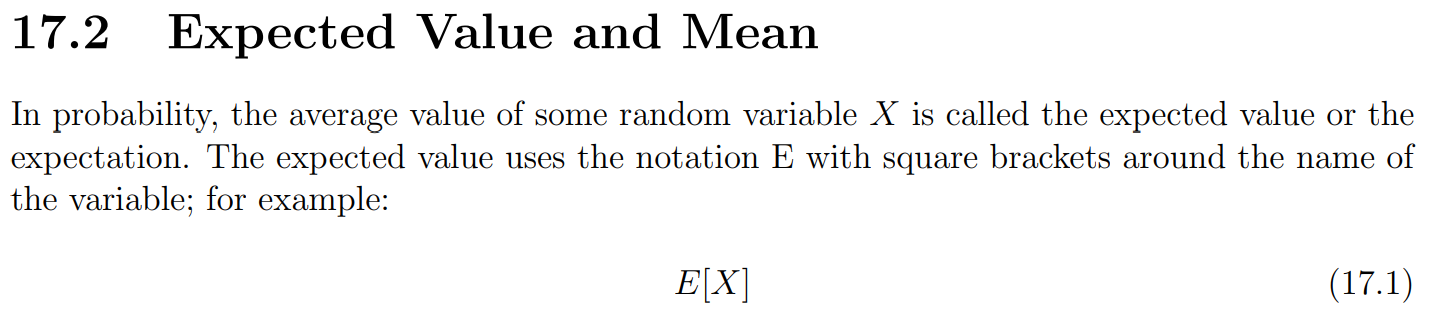

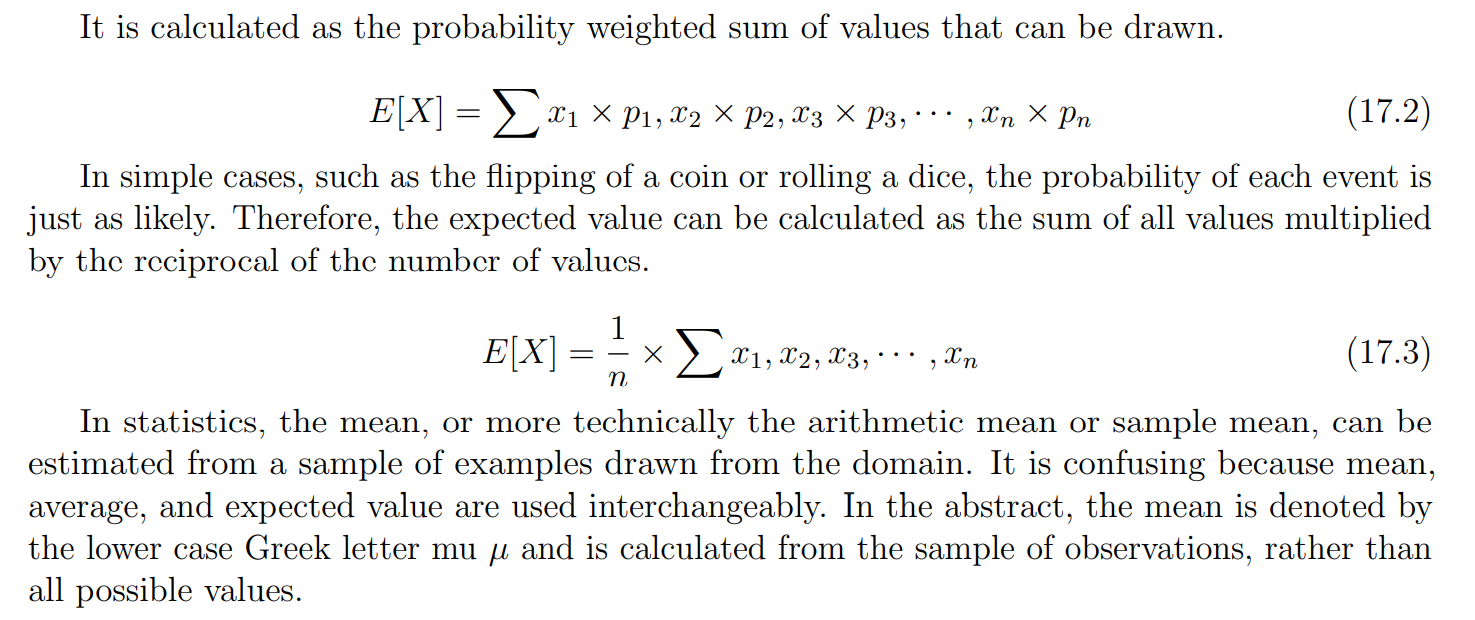

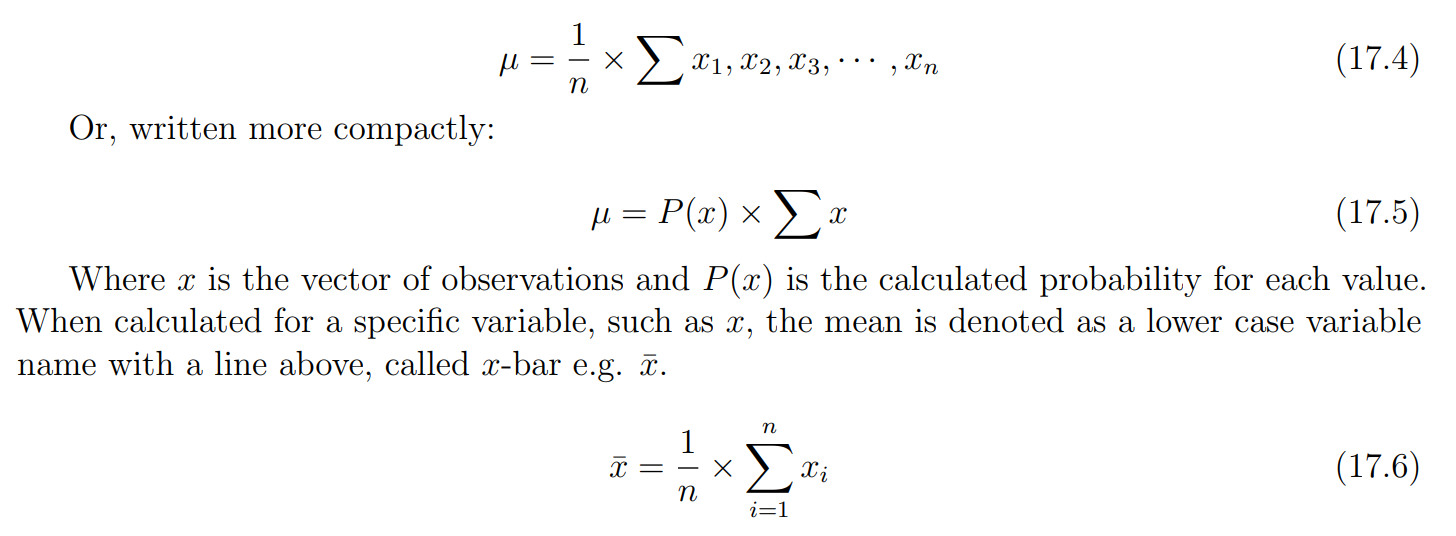

In [3]:
# vector mean
from numpy import array
from numpy import mean
# define vector
v = array([1,2,3,4,5,6])
print(v)
# calculate mean
result = mean(v)
print(result)

[1 2 3 4 5 6]
3.5


The mean function can calculate the row or column means of a matrix by specifying the
axis argument and the value 0 or 1 respectively. The example below defines a 2 × 6 matrix and
calculates both column and row means.

In [4]:
# matrix means
from numpy import array
from numpy import mean
# define matrix
M = array([
    [1,2,3,4,5,6],
    [1,2,3,4,5,6]])
print(M)
# column means
col_mean = mean(M, axis=0)
print(col_mean)
# row means
row_mean = mean(M, axis=1)
print(row_mean)

[[1 2 3 4 5 6]
 [1 2 3 4 5 6]]
[1. 2. 3. 4. 5. 6.]
[3.5 3.5]


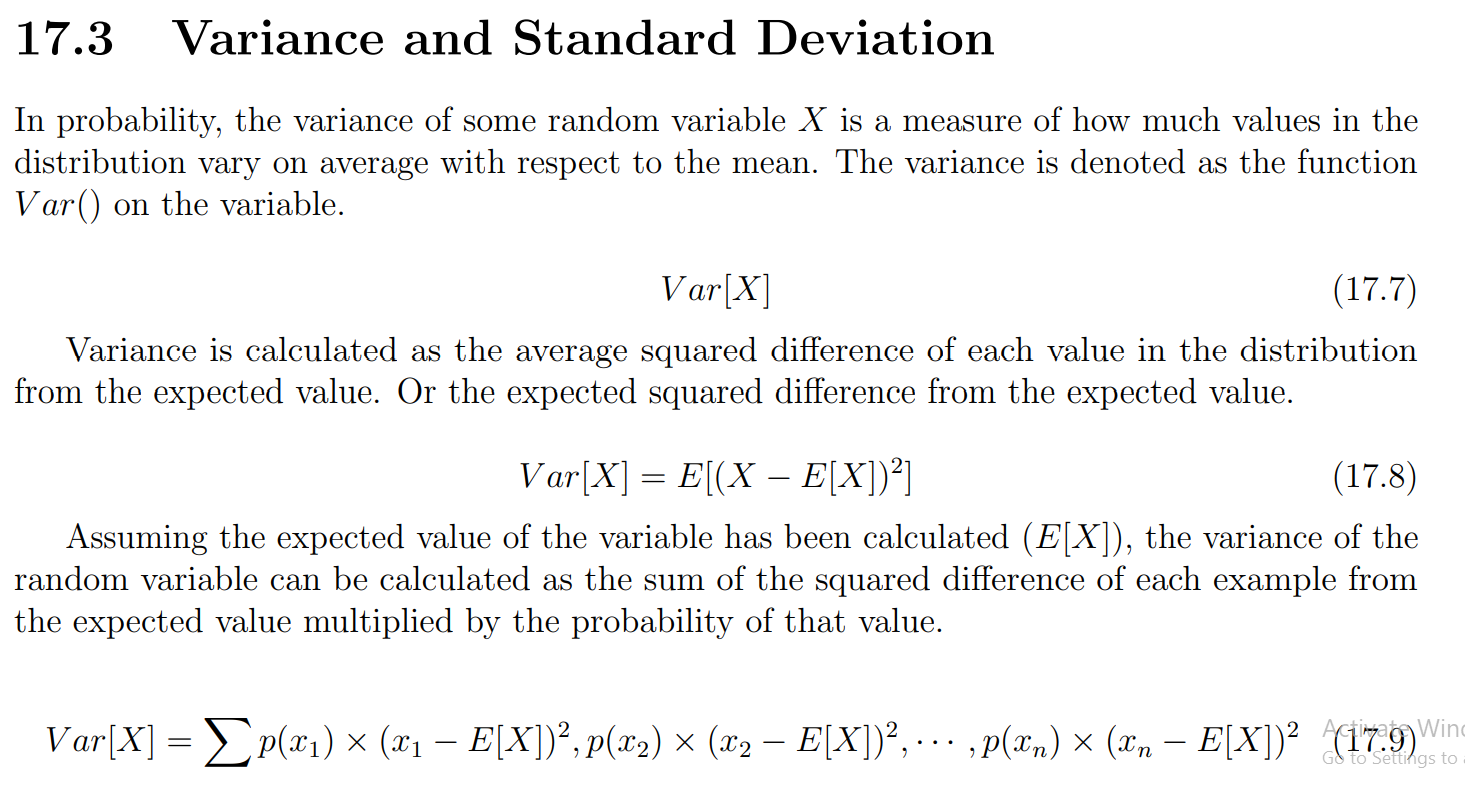

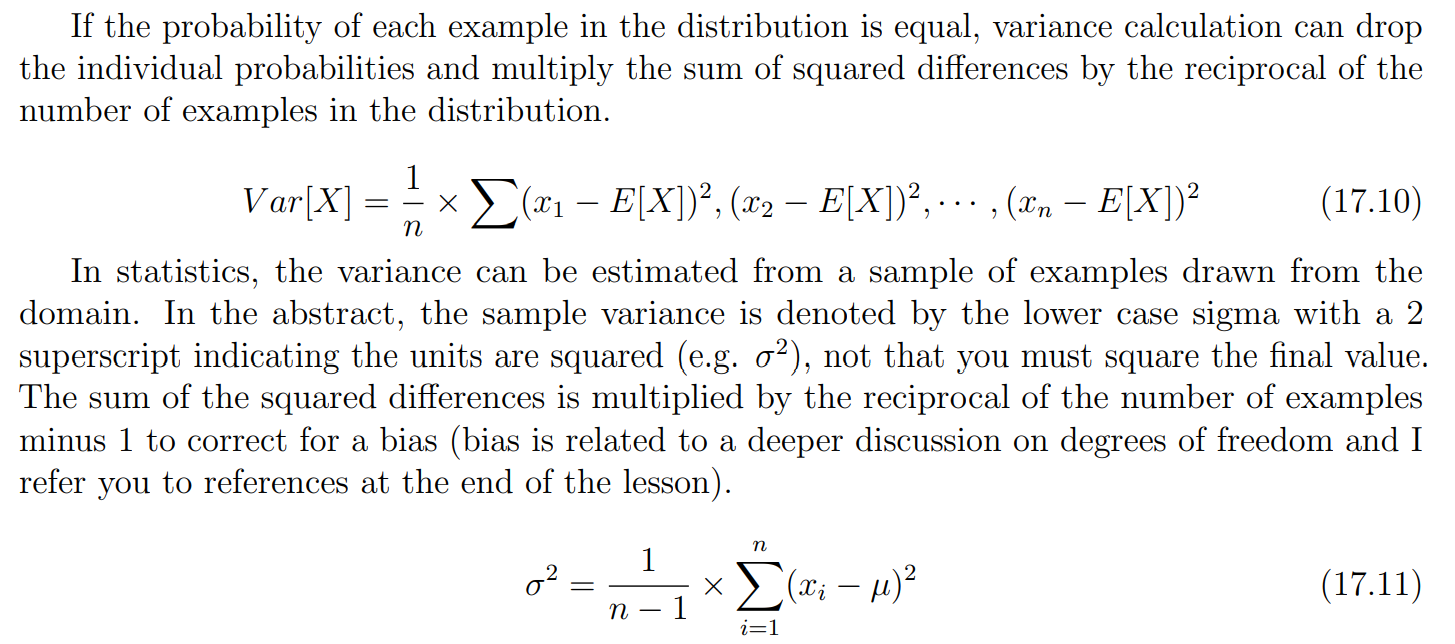

In [1]:
# vector variance
from numpy import array
from numpy import var
# define vector
v = array([1,2,3,4,5,6])
print(v)
# calculate sample variance
result = var(v, ddof=1)
print(result)

[1 2 3 4 5 6]
3.5


The var function can calculate the row or column variances of a matrix by specifying the
axis argument and the value 0 or 1 respectively, the same as the mean function above. The
example below defines a 2 × 6 matrix and calculates both column and row sample variances.

In [2]:
# matrix variances
from numpy import array
from numpy import var
# define matrix
M = array([
    [1,2,3,4,5,6],
    [1,2,3,4,5,6]])
print(M)
# column variances
col_var = var(M, ddof=1, axis=0)
print(col_var)
# row variances
row_var = var(M, ddof=1, axis=1)
print(row_var)

[[1 2 3 4 5 6]
 [1 2 3 4 5 6]]
[0. 0. 0. 0. 0. 0.]
[3.5 3.5]


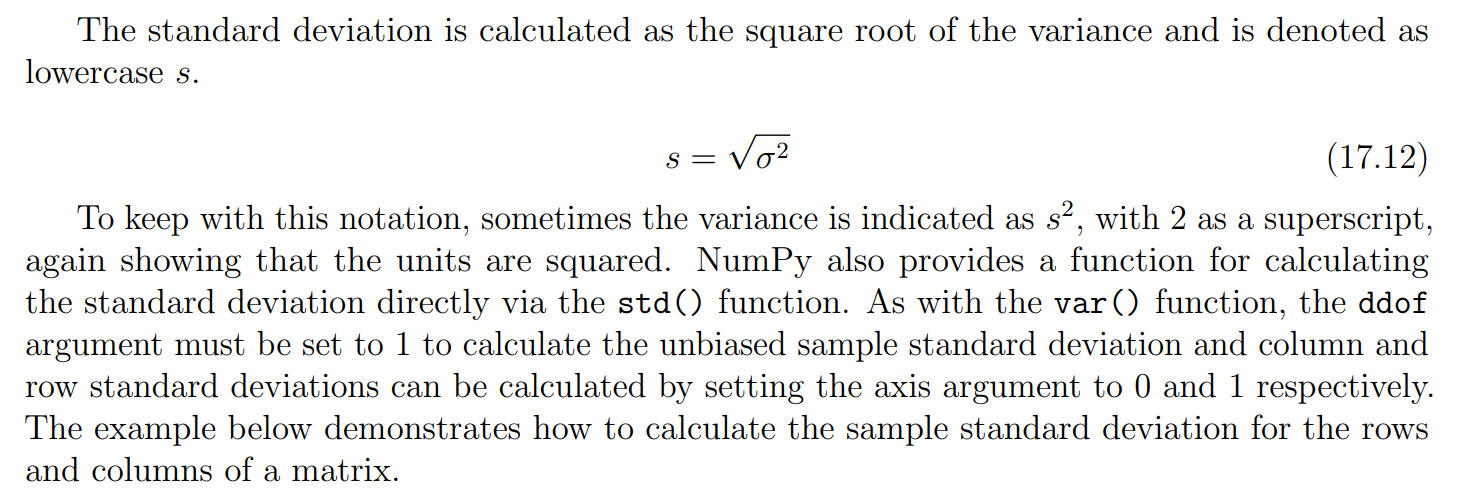

In [5]:
# matrix standard deviation
from numpy import array
from numpy import std
# define matrix
M = array([
    [1,2,3,4,5,6],
    [1,2,3,4,5,6]])
print(M)
# column standard deviations
col_std = std(M, ddof=1, axis=0)
print(col_std)
# row standard deviations
row_std = std(M, ddof=1, axis=1)
print(row_std)

[[1 2 3 4 5 6]
 [1 2 3 4 5 6]]
[0. 0. 0. 0. 0. 0.]
[1.87082869 1.87082869]


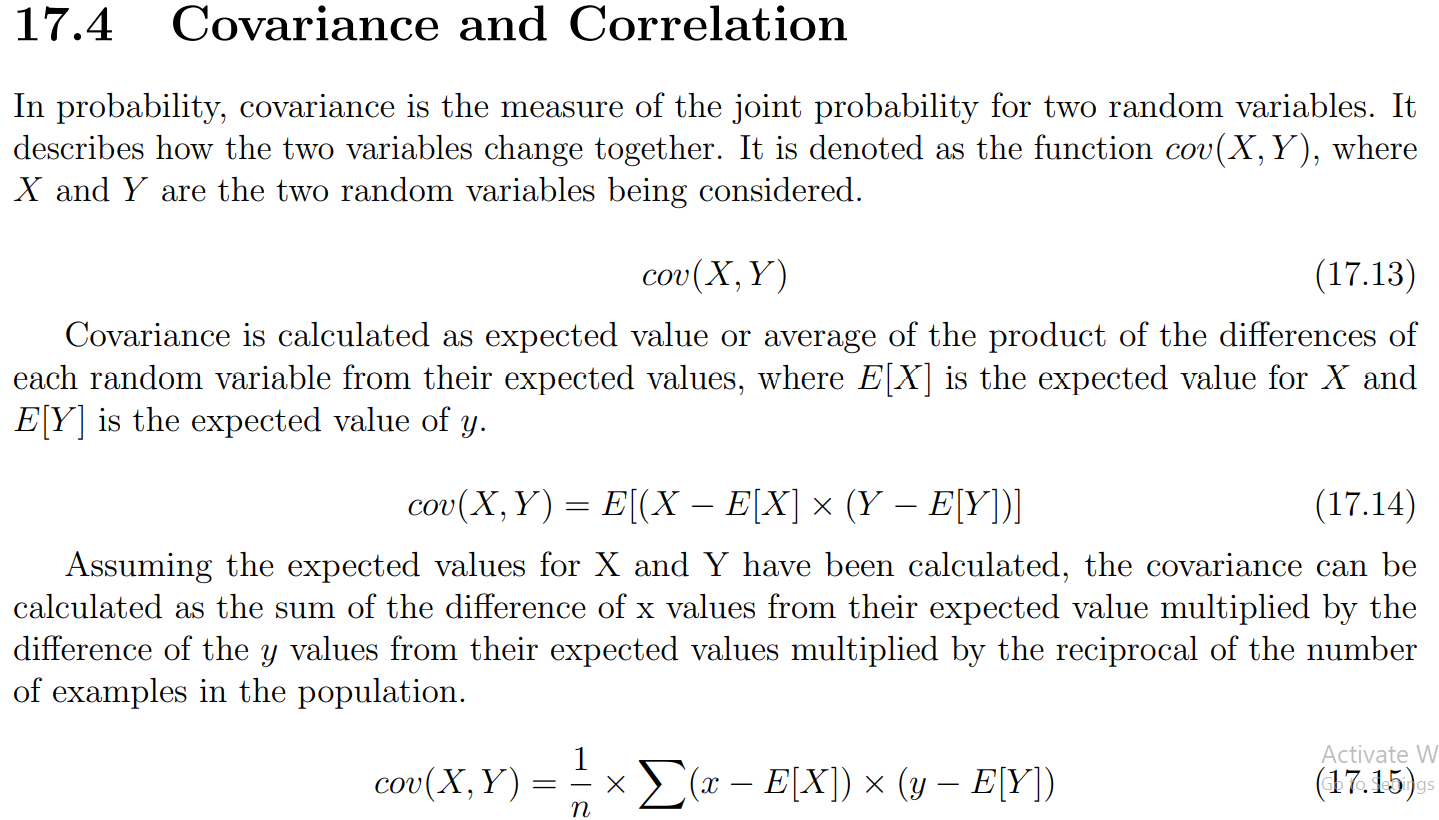

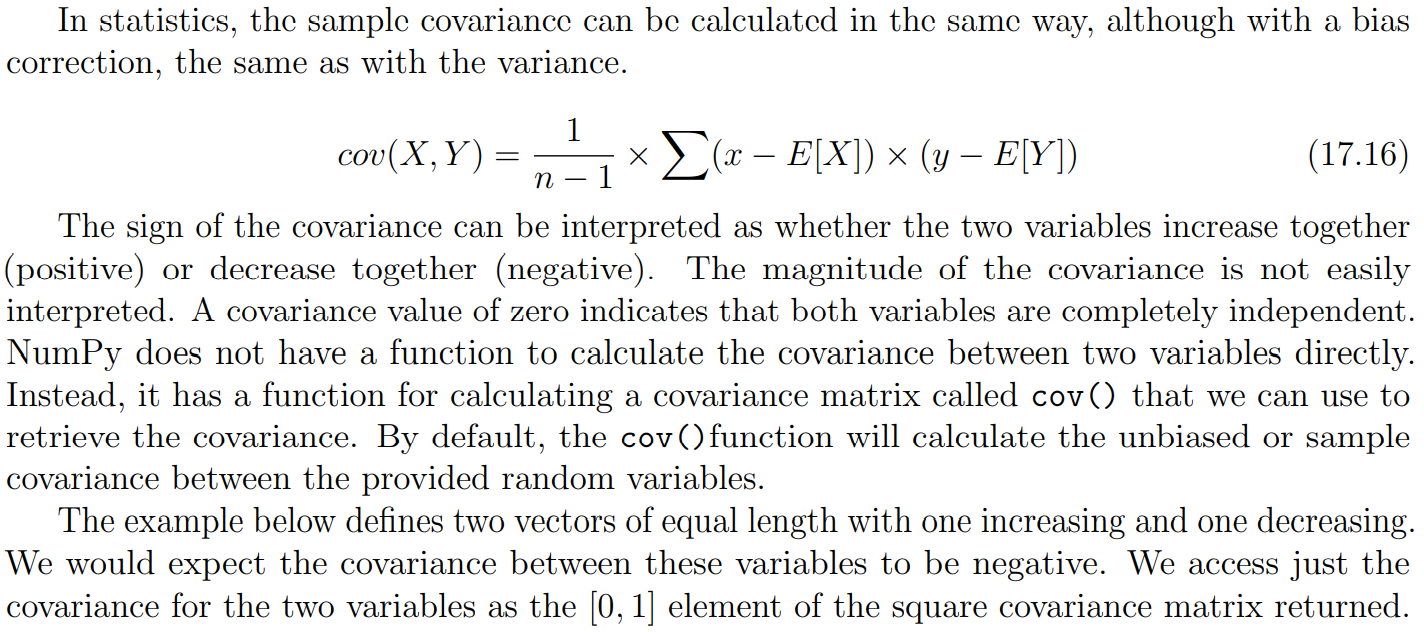

In [9]:
# vector covariance
from numpy import array
from numpy import cov
# define first vector
x = array([1,2,3,4,5,6,7,8,9])
print(x)
# define second covariance
y = array([9,8,7,13,5,4,3,2,1])
print(y)
# calculate covariance
Sigma = cov(x,y)[0,1]
print(Sigma)

[1 2 3 4 5 6 7 8 9]
[ 9  8  7 13  5  4  3  2  1]
-8.375


In [10]:
cov(x,y)

array([[ 7.5       , -8.375     ],
       [-8.375     , 14.69444444]])

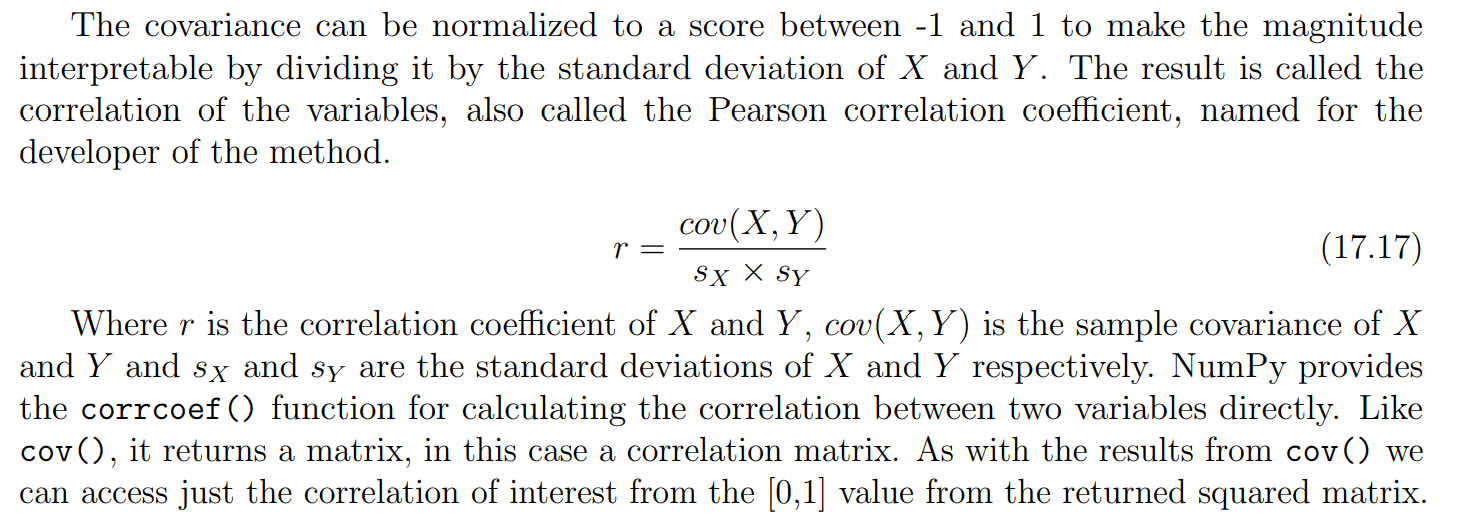

In [11]:
# vector correlation
from numpy import array
from numpy import corrcoef
# define first vector
x = array([1,2,3,4,5,6,7,8,9])
print(x)
# define second vector
y = array([9,8,7,6,5,4,3,2,1])
print(y)
# calculate correlation
corr = corrcoef(x,y)[0,1]
print(corr)

[1 2 3 4 5 6 7 8 9]
[9 8 7 6 5 4 3 2 1]
-1.0


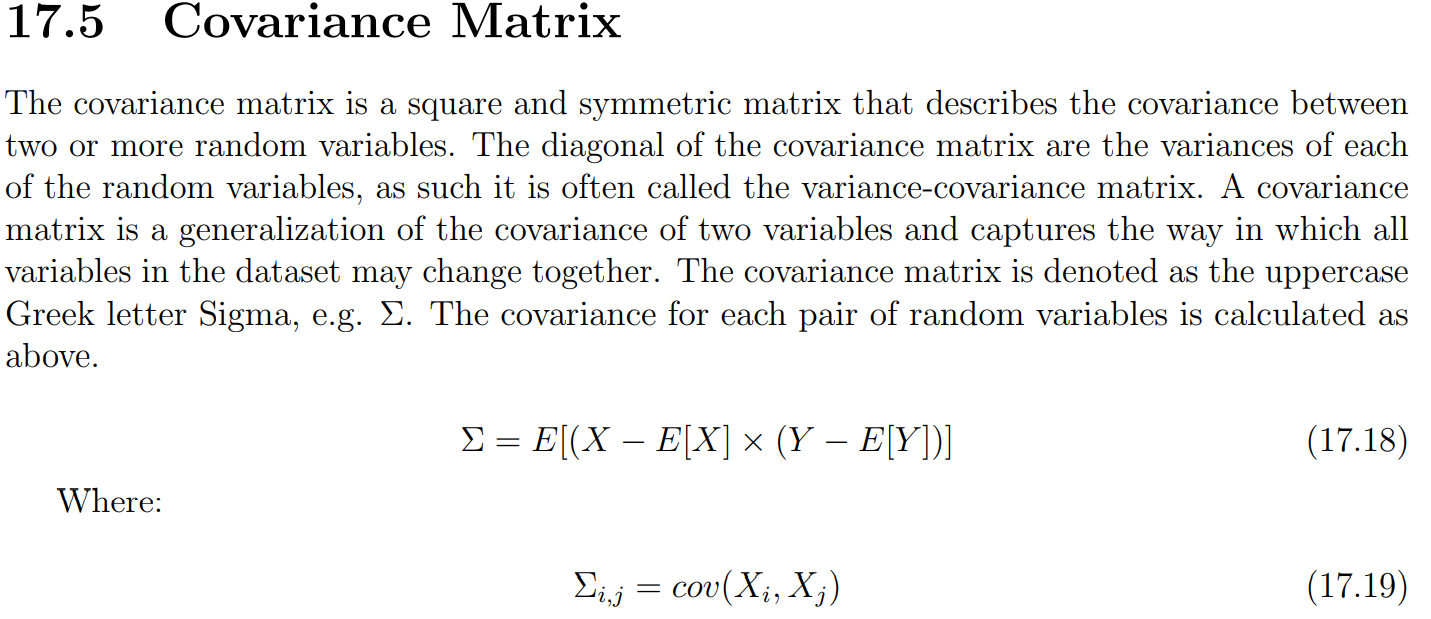

And X is a matrix where each column represents a random variable. The covariance matrix
provides a useful tool for separating the structured relationships in a matrix of random variables.
This can be used to decorrelate variables or applied as a transform to other variables. It is a key
element used in the Principal Component Analysis data reduction method, or PCA for short.
The covariance matrix can be calculated in NumPy using the cov() function. By default,
this function will calculate the sample covariance matrix. The cov() function can be called with
a single 2D array where each sub-array contains a feature (e.g. column). If this function is called
with your data defined in a normal matrix format (rows then columns), then a transpose of the
matrix will need to be provided to the function in order to correctly calculate the covariance of
the columns. Below is an example that defines a dataset with 5 observations across 3 features
and calculates the covariance matrix.

In [12]:
# covariance matrix
from numpy import array
from numpy import cov
# define matrix of observations
X = array([
    [1, 5, 8],
    [3, 5, 11],
    [2, 4, 9],
    [3, 6, 10],
    [1, 5, 10]])
print(X)
# calculate covariance matrix
Sigma = cov(X.T)
print(Sigma)

[[ 1  5  8]
 [ 3  5 11]
 [ 2  4  9]
 [ 3  6 10]
 [ 1  5 10]]
[[1.   0.25 0.75]
 [0.25 0.5  0.25]
 [0.75 0.25 1.3 ]]


##### The covariance matrix is used widely in linear algebra and the intersection of linear algebra and statistics called multivariate analysis. We have only had a small taste.

# What is Principal Component Analysis
Principal Component Analysis, or PCA for short, is a method for reducing the dimensionality
of data. It can be thought of as a projection method where data with m-columns (features) is
projected into a subspace with m or fewer columns, whilst retaining the essence of the original
data. The PCA method can be described and implemented using the tools of linear algebra.

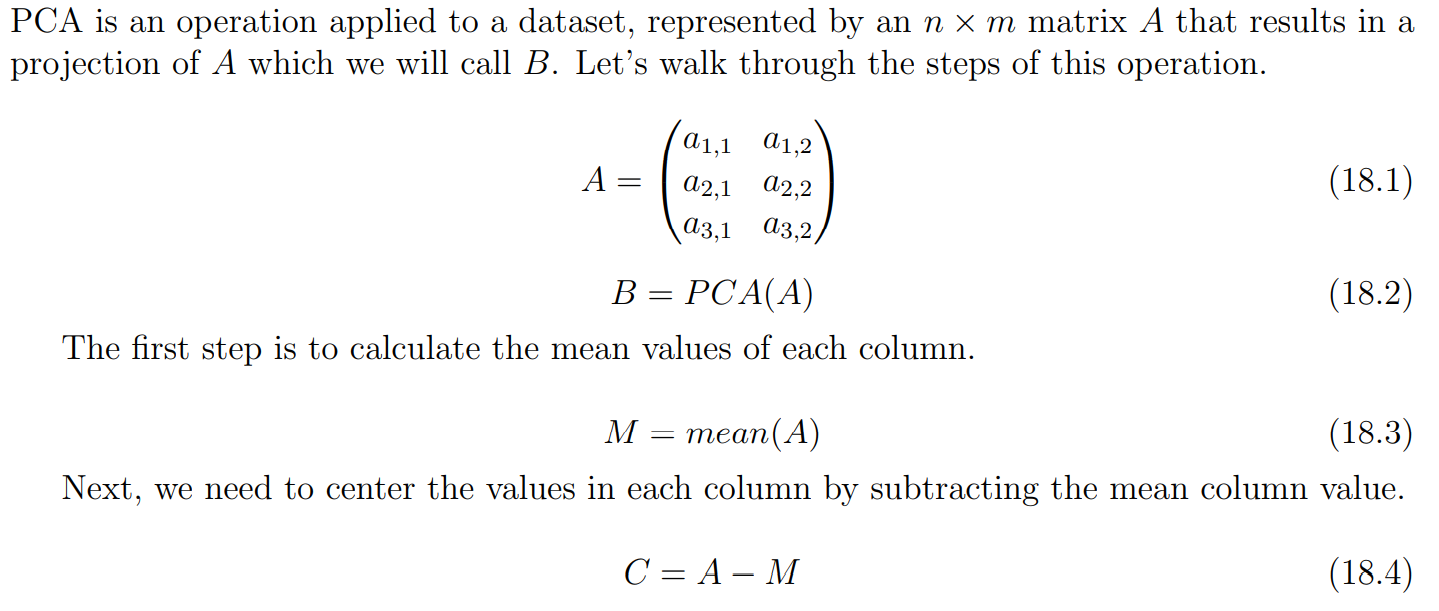

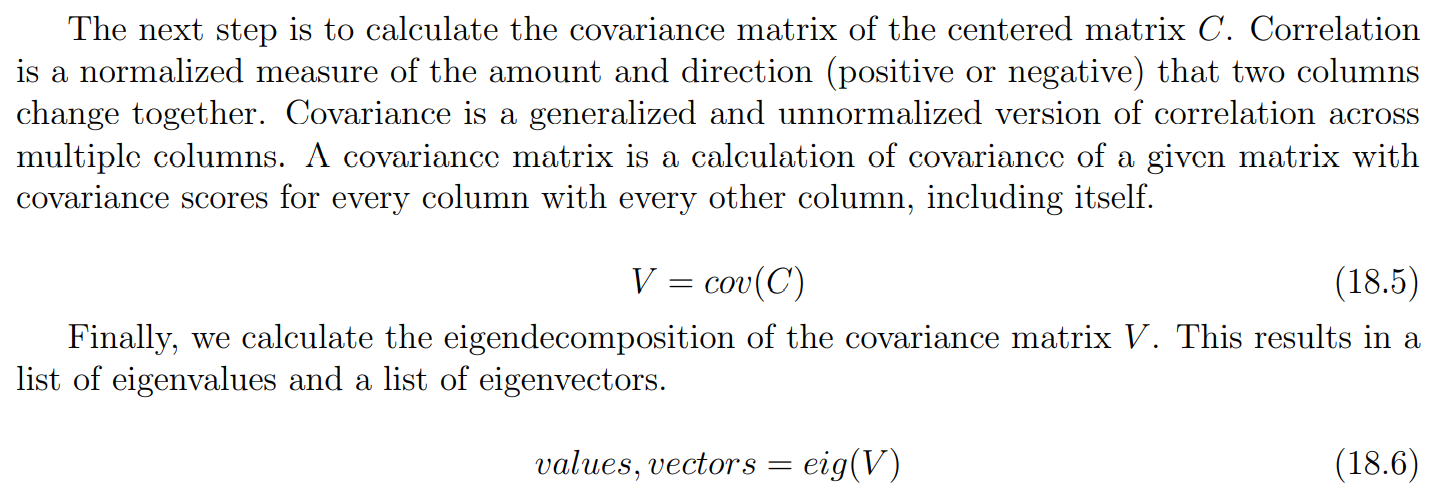

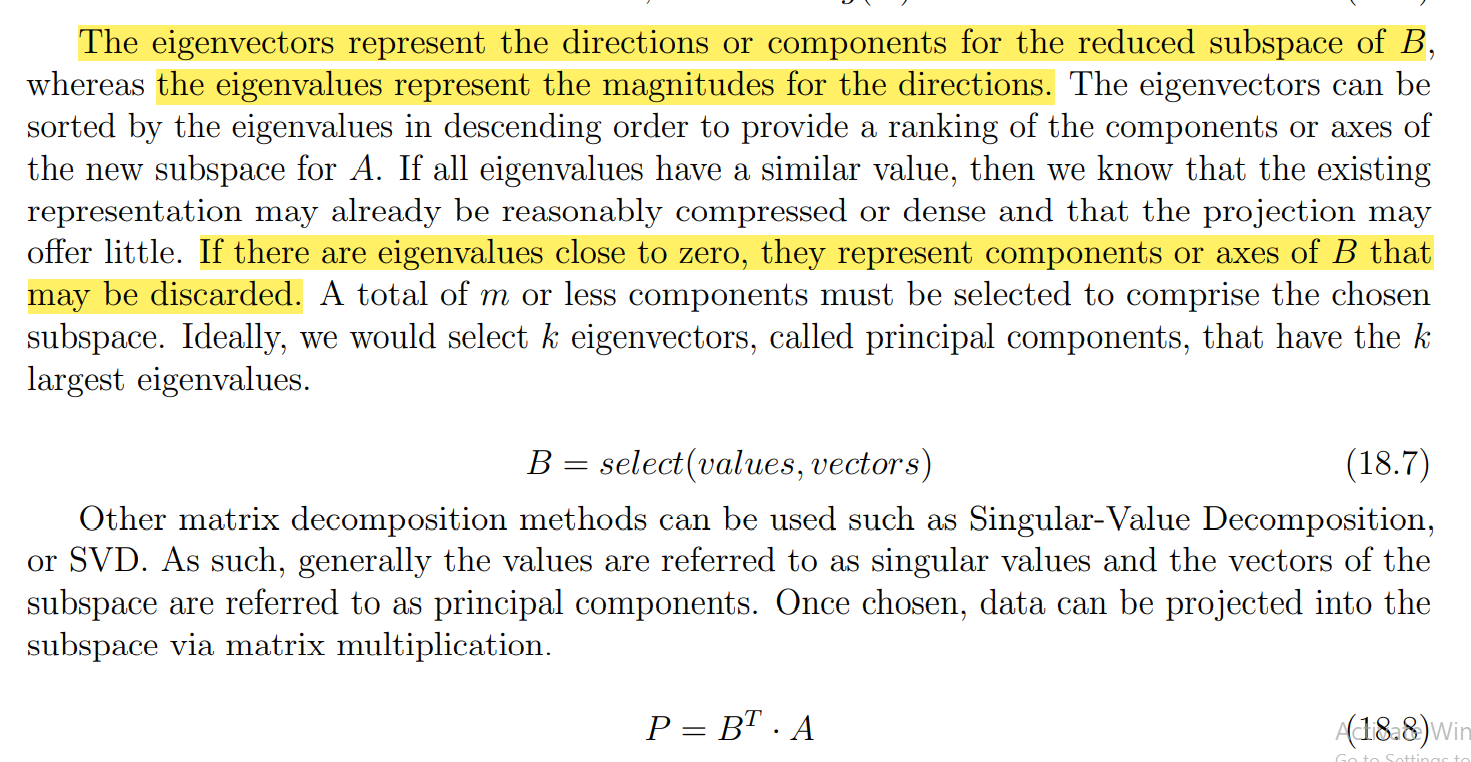

Where A is the original data that we wish to project, BT
is the transpose of the chosen
principal components and P is the projection of A. This is called the covariance method for
calculating the PCA, although there are alternative ways to calculate it.

In [1]:
# principal component analysis
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# define matrix
A = array([
    [1, 2],
    [3, 4],
    [5, 6]])
print(A)
# column means
M = mean(A.T, axis=1)
# center columns by subtracting column means
C = A - M
# calculate covariance matrix of centered matrix
V = cov(C.T)
# factorize covariance matrix, eigen values and eigen vectors
values, vectors = eig(V)
print(vectors)
print(values)
# project data
P = vectors.T.dot(C.T)
print(P.T)

[[1 2]
 [3 4]
 [5 6]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[8. 0.]
[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


In [1]:
# principal component analysis with scikit-learn
from numpy import array
from sklearn.decomposition import PCA
# define matrix
A = array([
    [1, 2],
    [3, 4],
    [5, 6]])
print(A)
# create the transform
pca = PCA(2)
# fit transform
pca.fit(A)
# access values and vectors
print(pca.components_)
print(pca.explained_variance_)
# transform data
B = pca.transform(A)
print(B)

[[1 2]
 [3 4]
 [5 6]]
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
[8.00000000e+00 2.25080839e-33]
[[-2.82842712e+00  2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00 -2.22044605e-16]]
